###**Importing required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Reading Data**<br><br>
Attribute Information:<br>
Sample code number: id number<br>
Clump Thickness: 1 - 10<br>
Uniformity of Cell Size: 1 - 10<br>
Uniformity of Cell Shape: 1 - 10<br>
Marginal Adhesion: 1 - 10<br>
Single Epithelial Cell Size: 1 - 10<br>
Bare Nuclei: 1 - 10<br>
Bland Chromatin: 1 - 10<br>
Normal Nucleoli: 1 - 10<br>
Mitoses: 1 - 10<br>
Class: (2 for benign, 4 for malignant)<br>
Malignant==> Cancerous<br>
Benign==> Not Cancerous (Healthy)<br><br>
Background:<br>
All of our bodies are composed of cells. The human body has about 100 trillion cells within it. And usually those cells behave in a certain way. However, occasionally, one of these 100 trillion cells, behave in a different way and keeps dividing and pushes the other cells around it out of the way. That cell stops observing the rules of the tissue within which it is located and begins to move out of its normal position and starts invading into the tissues around it and sometimes entering the bloodstream and becoming is called a metastasis.
In summary, as we grow older,throughout a lifetime, we go through this knid of situation where a particular kind of gene is mutated where the protein that it makes is abnormal and drives the cell to behave in a different way that we call cancer.
This is what Dr. WIlliam H. Wolberg was observing and put together this dataset.

In [2]:
df = pd.read_csv('breastCancer.csv')

In [3]:
df.head() #Displaying initial few rows of data

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

Dataset contains 699 rows of data and 11 columns or features of data.

---




##**Data Preprocessing**

In [5]:
df['class'].value_counts() #Target features

2    458
4    241
Name: class, dtype: int64

2 -> Benign (No Cancer)<br>
4 -> Malignant (Cancer)

In [6]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

Feature "bare_nucleoli" seems to have numerical data, but some of the data can be non digit. So we need to clean our data.

In [7]:
print(df['bare_nucleoli'])

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object


In [8]:
df[df['bare_nucleoli']== '?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [9]:
df[df['bare_nucleoli']== '?'].sum()


id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [10]:
list1 = []
c = 0
for i in df['bare_nucleoli']:
  try:
    list1.append(int(i))
  except:
    list1.append(np.nan)
    c+=1

print('''No. of datapoints in the column 'bare_nucleoli' with non digit values = ''', c)

No. of datapoints in the column 'bare_nucleoli' with non digit values =  16


In [11]:
df['bare_nucleoli'] = list1

In [12]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [13]:
df.dtypes

id                     int64
clump_thickness        int64
size_uniformity        int64
shape_uniformity       int64
marginal_adhesion      int64
epithelial_size        int64
bare_nucleoli        float64
bland_chromatin        int64
normal_nucleoli        int64
mitoses                int64
class                  int64
dtype: object

All the datatypes are converted into numerical data, we can use the data to make predictions

In [14]:
df.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [15]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [16]:
df = df.fillna(value = df.median())

In [17]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [18]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

---

##**Exploratory Data Analysis**

Dropping the id feature as it is, having no relation with our target feature.

In [19]:
df.drop(labels = 'id', axis = 1, inplace = True)

In [20]:
df.columns

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


**Bivariate Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


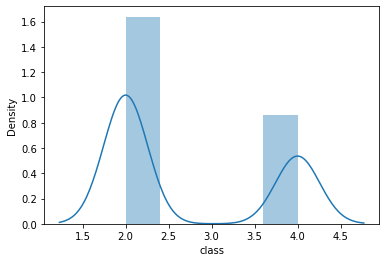

In [22]:
sns.distplot(df['class'])

plt.show()

2 -> Benign
4 -> Malignant

**Multivariate Data Analysis**

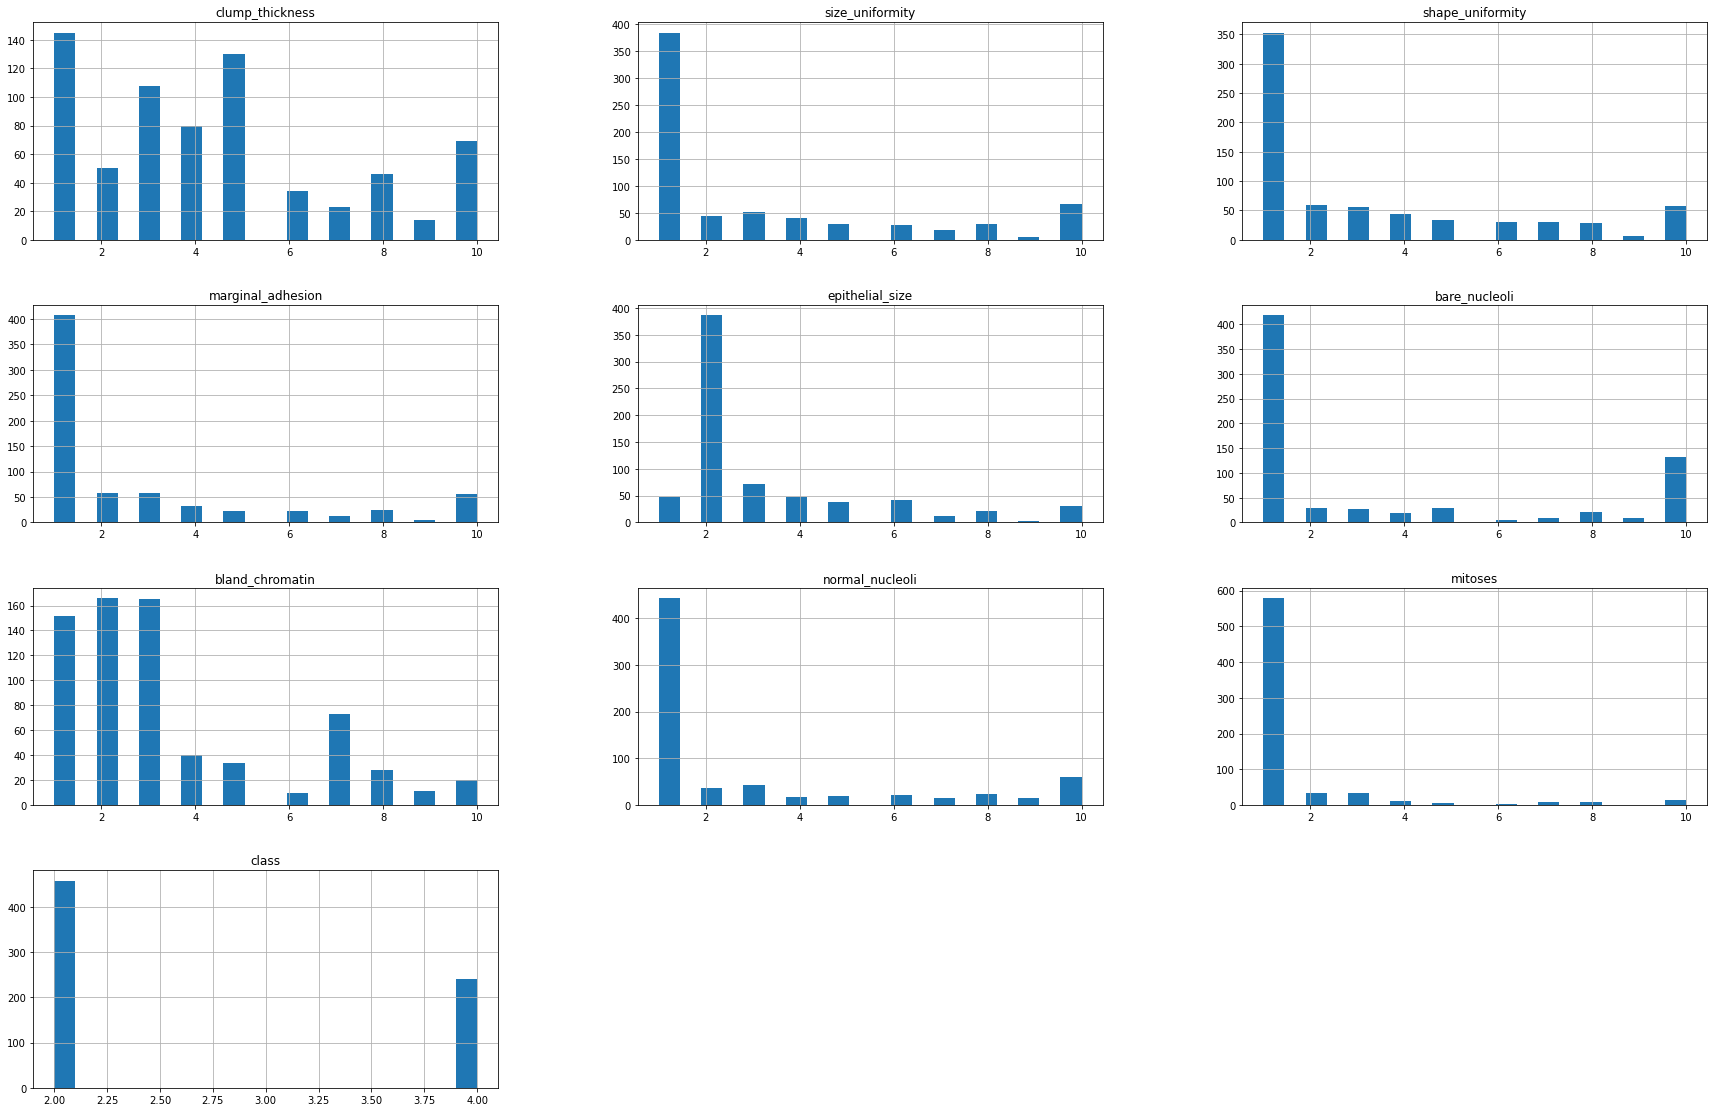

In [23]:
df.hist(bins=20, figsize=(30,30), layout=(6, 3))

plt.show()

**BoxPlot**

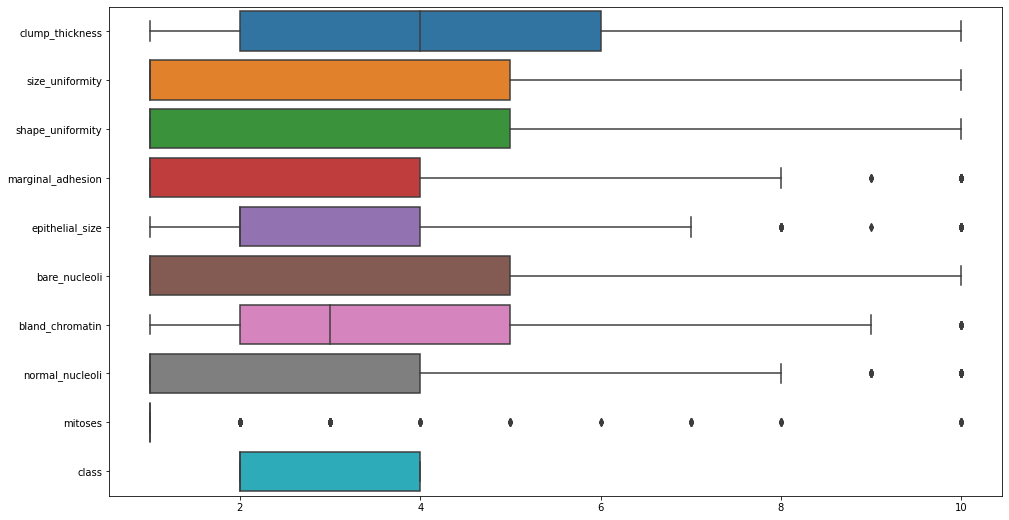

In [24]:
plt.figure(figsize=(16,9))
sns.boxplot(data = df, orient = 'h')
plt.show()

**Correlation**

In [25]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


**Correlation Heatmap**

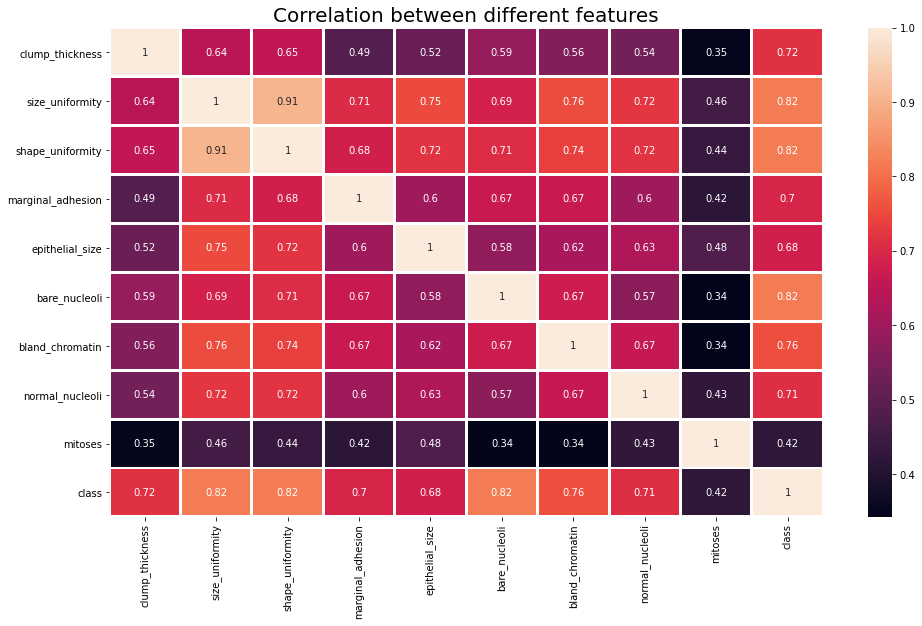

In [26]:
plt.figure(figsize=(16,9))

sns.heatmap(data = df.corr(), annot = True, linewidths = 2)
plt.title('Correlation between different features', fontsize = 20)
plt.show()

**PairPlot**

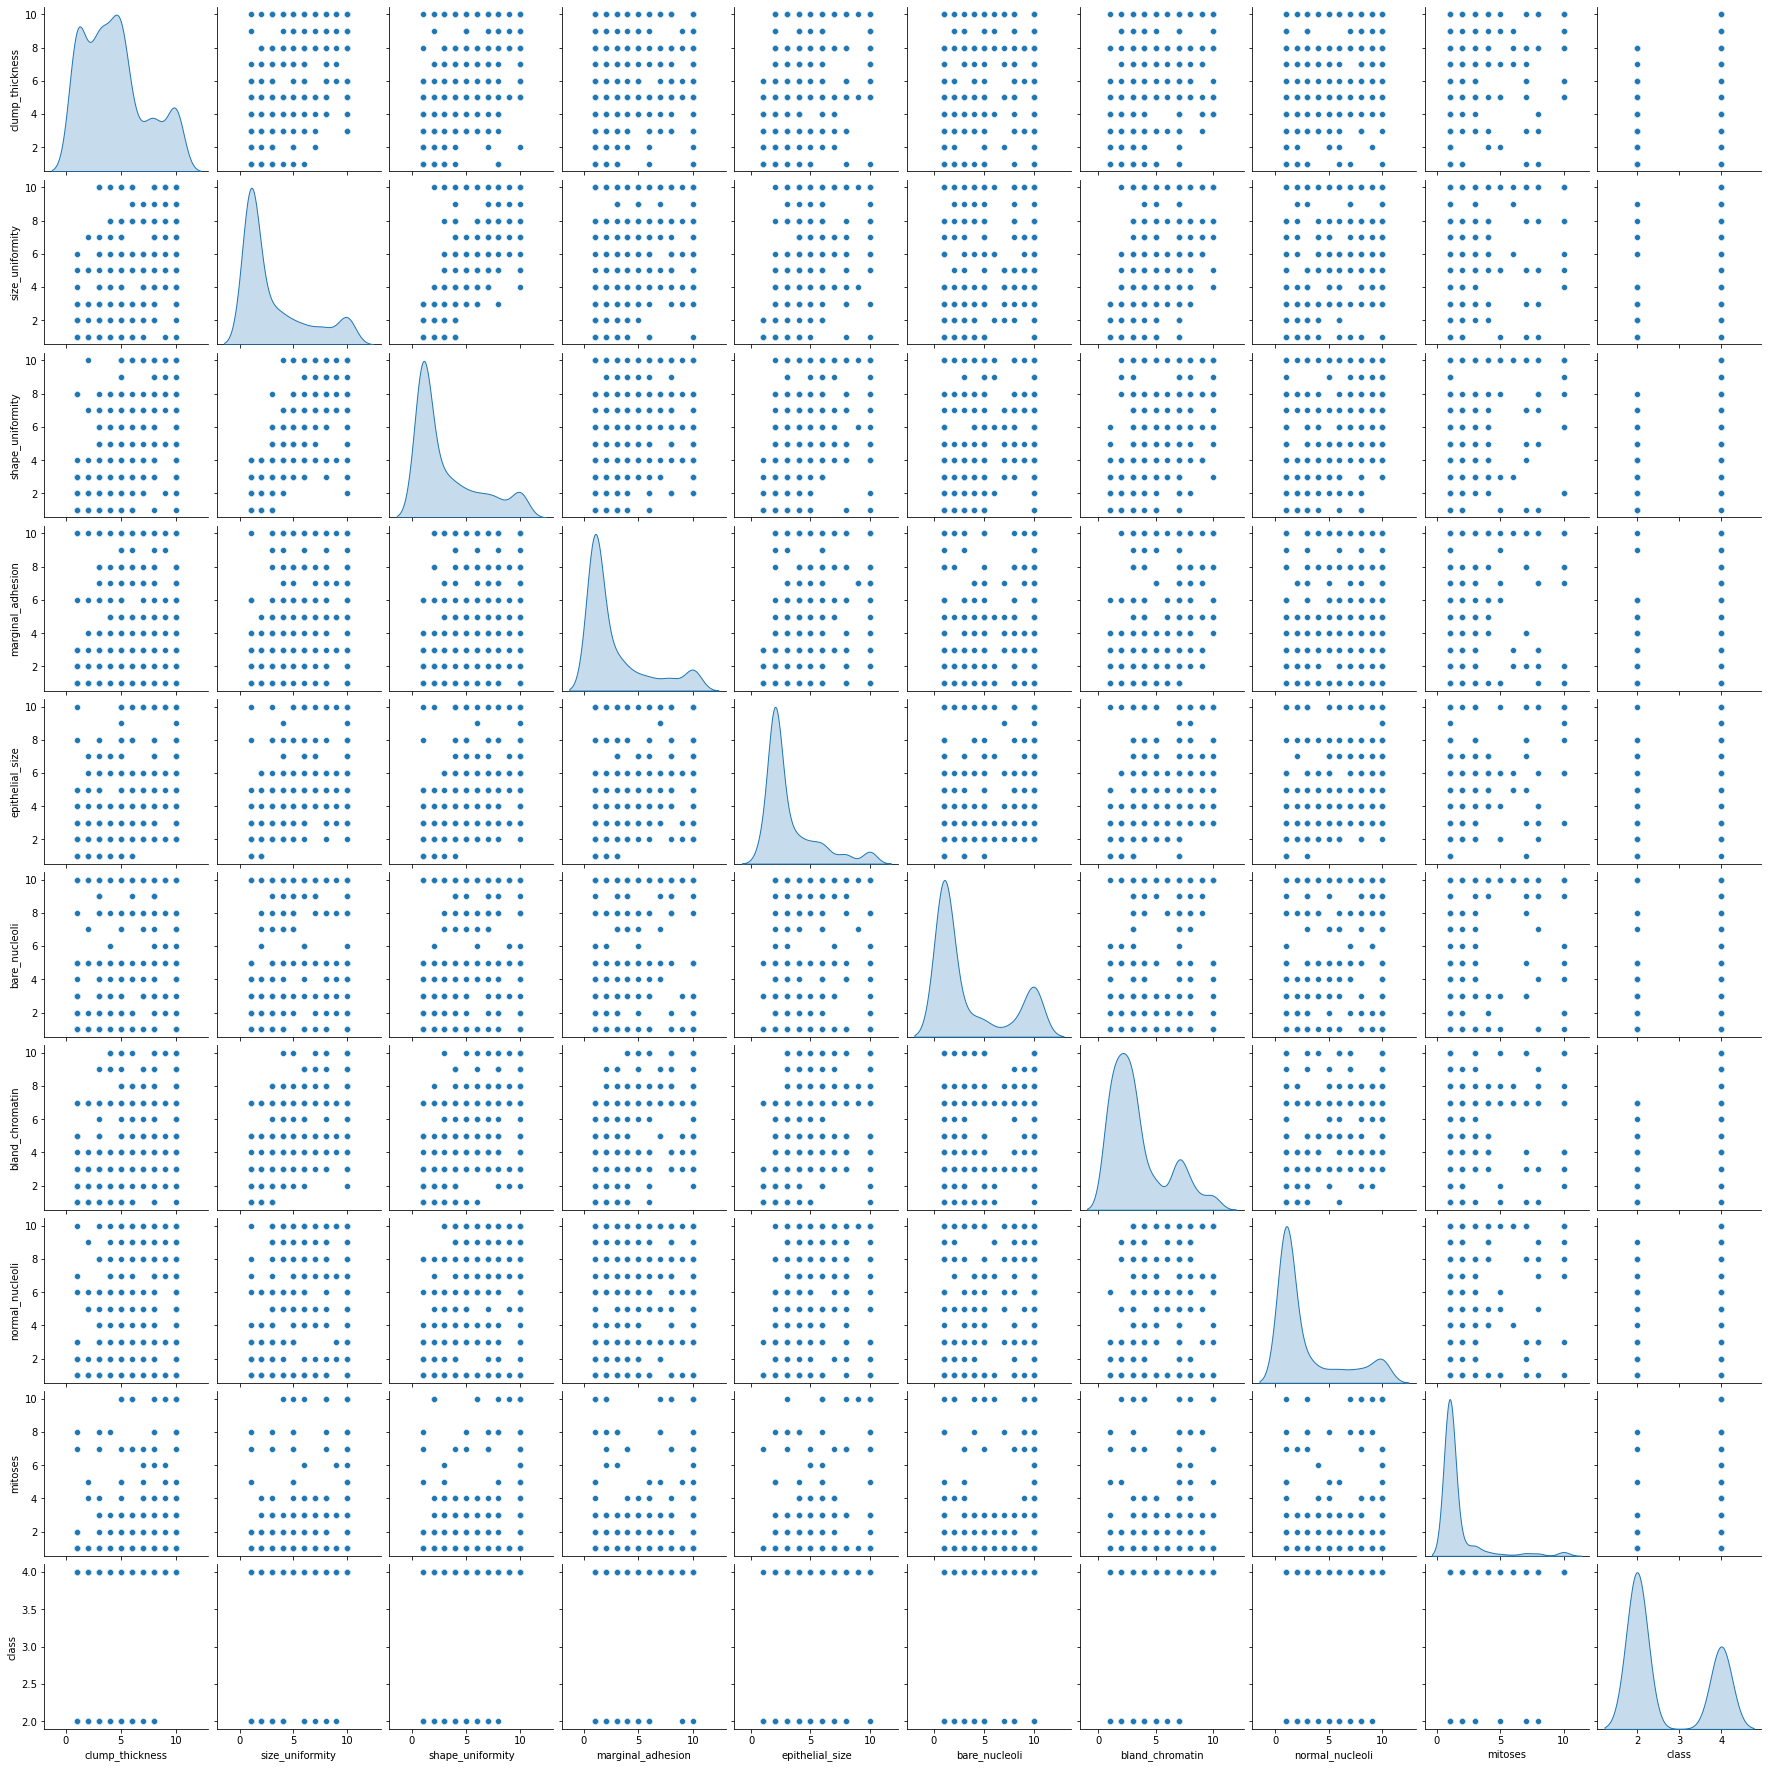

In [27]:
sns.pairplot(data = df, diag_kind = 'kde')
plt.show()



---



##**Building Model**





In [28]:
X_data = df.drop('class', axis = 1)
y_data = df['class']

#####Splitting Data into train and test sets

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 1)

**Model - 1 : KNN Algorithm (K-Nearest Neighbour)**


In [30]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [31]:
KNN_pred = KNN.predict(X_test)
KNN_pred

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2])

In [32]:
print('KNeighborsClassifier Algorithm is predicting at {0:.4g}%'.format(KNN.score(X_test, y_test)*100))

KNeighborsClassifier Algorithm is predicting at 97.14%


**Model - 2 : SVM Algorithm (Support Vector Machine)**

In [33]:
from sklearn.svm import SVC

SVM = SVC(gamma = 0.025, C = 3)

SVM.fit(X_train, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
SVM_pred = SVM.predict(X_test)
SVM_pred

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2])

In [35]:
print('SVM Algorithm is predicting at {0:.4g}%'.format(SVM.score(X_test, y_test)*100))

SVM Algorithm is predicting at 98.1%


In [36]:
pred_df = pd.concat([pd.DataFrame(KNN_pred), pd.DataFrame(SVM_pred)], axis = 1)
pred_df.columns = ['KNN', 'SVM']
pred_df

,KNN,SVM
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,2


In [37]:
print(pred_df['KNN'].value_counts(), '\n')
print(pred_df['SVM'].value_counts())

2    141
4     69
Name: KNN, dtype: int64 

2    137
4     73
Name: SVM, dtype: int64


---
##**Classification Report**

In [38]:
from sklearn.metrics import classification_report

In [39]:
print('Classification Report for KNN Algorithm\n\n', classification_report(y_test, KNN_pred))

Classification Report for KNN Algorithm

               precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [40]:
print('Classification Report for SVM Algorithm\n\n', classification_report(y_test, SVM_pred))

Classification Report for SVM Algorithm

               precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



Classification report **Confusion Matrix**

In [41]:
from sklearn import metrics

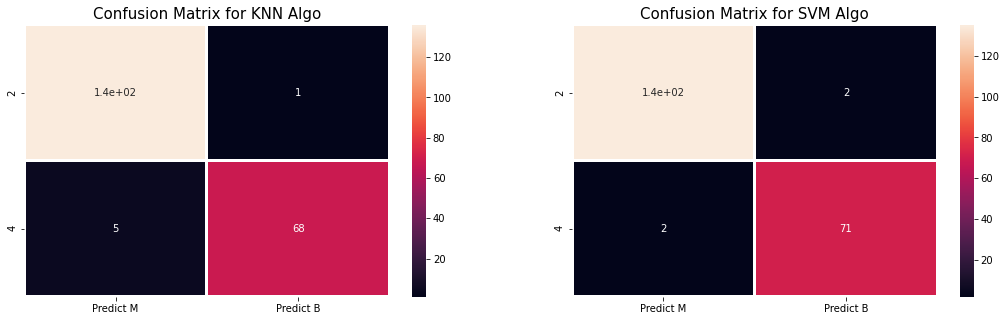

In [42]:
cm_KNN = metrics.confusion_matrix(y_test, KNN_pred, labels = [2, 4])
cm_SVM = metrics.confusion_matrix(y_test, SVM_pred, labels = [2, 4])

df_cm_KNN = pd.DataFrame(cm_KNN, index = [i for i in [2,4]], columns = [i for i in ["Predict M","Predict B"]])
df_cm_SVM = pd.DataFrame(cm_SVM, index = [i for i in [2,4]], columns = [i for i in ["Predict M","Predict B"]])

plt.figure(figsize = (18,5))

plt.subplot(1,2,1)
sns.heatmap(df_cm_KNN, annot = True, linewidths= 2)
plt.title('Confusion Matrix for KNN Algo', fontsize = 15)

plt.subplot(1,2,2)
sns.heatmap(df_cm_SVM, annot = True, linewidths= 2)
plt.title('Confusion Matrix for SVM Algo', fontsize = 15)

plt.show()